# Домашнее задание № 9. Предобученные трансформеры

### Задание 1 (8 баллов).
Дообучите 3 предобученных модели на тех же данных, что и в семинаре. Сравните качество и выберите лучшую.
Модели должны отличаться друг от друга не только параметрами ru/en/multilingual, base/large, cased/uncased. Все три выбранные модели должны работать лучше, чем бейзлайн без дообучения (т.е. если модель не работает, попробуйте другую).


In [1]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip uninstall tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tensorflow-gpu

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install transformers

     ---------------------------------------- 7.2/7.2 MB 21.8 MB/s eta 0:00:00
     ---------------------------------------- 153.2/153.2 kB ? eta 0:00:00
     ------------------------------------- 263.9/263.9 kB 15.9 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 44.3 MB/s eta 0:00:00
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
     ------------------------------------- 268.4/268.4 kB 16.1 MB/s eta 0:00:00
     ------------------------------------- 236.8/236.8 kB 14.2 MB/s eta 0:00:00
  Using cached fsspec-2023.1.0-py3-none-any.whl (143 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
# стандартные библиотеки
import os, re
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
%matplotlib inline


# tf и huggingface
import tensorflow as tf
from transformers import TFAutoModel, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer

In [6]:
data = pd.read_csv('lenta_sample.csv')
data.dropna(subset=['topic', 'text'], inplace=True)

In [7]:
data.topic.value_counts()

Из жизни             55
Наука и техника      54
Бывший СССР          54
Культура             53
Ценности             45
Дом                  45
Бизнес               44
Интернет и СМИ       44
Силовые структуры    40
Спорт                39
Россия               32
Экономика            32
Мир                  27
69-я параллель       13
Легпром              13
Библиотека           10
Крым                  7
Name: topic, dtype: int64

In [8]:
data.shape

(607, 6)

# Модель 1

In [9]:
tokenizer_1 = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

model_1 = TFAutoModel.from_pretrained("DeepPavlov/rubert-base-cased", from_pt=True)

C:\Users\robst\PycharmProjects\HSE_NLP\venv2\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\robst\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the 

In [10]:
data.loc[4, 'title']

'По факту пожара на\xa0заводе в\xa0Югре заведено дело'

In [29]:
data

,url,title,text,topic,tags,date
0,https://lenta.ru/news/2010/12/16/passports/,Московская милиция ужесточила паспортный режим,В Москве после серии массовых беспорядков на н...,Россия,Все,2010/12/16
1,https://lenta.ru/news/2014/05/19/student/,Московского студента ограбили на 6 миллионов р...,Неизвестные вынесли из квартиры московского ст...,Россия,NaN,2014/05/19
2,https://lenta.ru/news/2008/09/27/catch/,В Ставропольском крае обезврежены боевики,"В Ставропольском крае задержаны боевики, котор...",Россия,Все,2008/09/27
3,https://lenta.ru/news/2009/07/23/refuse/,Лужков отказался трудоустраивать китайцев с Че...,"Мэр Москвы Юрий Лужков заявил, что не намерен ...",Россия,Все,2009/07/23
4,https://lenta.ru/news/2012/09/29/factory/,По факту пожара на заводе в Югре заведено дело,Следственный комитет России возбудил уголовное...,Россия,Все,2012/09/29
...,...,...,...,...,...,...
602,https://lenta.ru/news/2014/09/14/pattern/,1914. Выкройки для раненых,"В дополнение к выкройкам белья для раненых, ра...",Библиотека,Первая мировая,2014/09/14
603,https://lenta.ru/news/2014/12/23/christmas/,1914. Немецкие и британские солдаты отметили п...,24 декабря в Бельгии в районе Ипра произошло н...,Библиотека,Первая мировая,2014/12/23
604,https://lenta.ru/news/2014/10/21/dobrovolec/,1914. Польский доброволец-герой,В числе поступивших в нашу армию добровольцев ...,Библиотека,Первая мировая,2014/10/21
605,https://lenta.ru/news/2014/09/18/postoffice/,1914. Письма в действующую армию на деревню де...,За последнее время на имя начальника штаба Вер...,Библиотека,Первая мировая,2014/09/18


In [11]:
# переводим тексты в последовательности индексов
# У берта есть ограничение на максимальную длину последовательности - 512
# Для заголовков это не очень актуально, но для других данных пригодится

X = []

for text in data.title:
    ids = tokenizer_1.encode(text)

    X.append(ids[:512])

In [12]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

In [13]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [14]:
X.shape

(607, 512)

In [15]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)

In [16]:
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [44]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")
output = model_1(input_word_ids)
drop = tf.keras.layers.Dropout(0.1)(output[0][:, 0])
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_1_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)

model_1_clf.compile(tf.optimizers.Adam(learning_rate=2e-6),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [45]:
model_1_clf.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=4,
         epochs=20)

Epoch 1/20


144/144 [==============================] - 124s 543ms/step - loss: 2.9215 - accuracy: 0.0642 - rec_prec: 0.0000e+00 - val_loss: 2.7457 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 2/20
144/144 [==============================] - 73s 508ms/step - loss: 2.8350 - accuracy: 0.0642 - rec_prec: 0.0000e+00 - val_loss: 2.7765 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 3/20
144/144 [==============================] - 72s 501ms/step - loss: 2.8414 - accuracy: 0.0816 - rec_prec: 0.0000e+00 - val_loss: 2.7465 - val_accuracy: 0.0323 - val_rec_prec: 0.0000e+00
Epoch 4/20
144/144 [==============================] - 74s 513ms/step - loss: 2.7803 - accuracy: 0.0816 - rec_prec: 0.0000e+00 - val_loss: 2.7702 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 5/20
144/144 [==============================] - 75s 524ms/step - loss: 2.7952 - accuracy: 0.0694 - rec_prec: 0.0000e+00 - val_loss: 2.7449 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 6/20
144/144 [===============

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


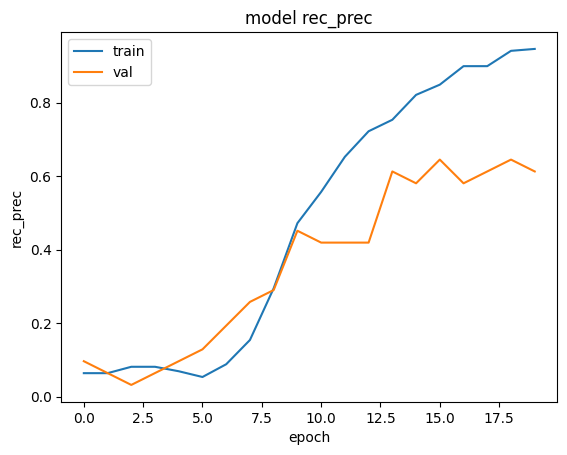

In [46]:
print(model_1_clf.history.history.keys())
plt.plot(model_1_clf.history.history['accuracy'])
plt.plot(model_1_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
from sklearn.metrics import classification_report

In [48]:
pred = model_1_clf.predict(X_valid, batch_size=5).argmax(1)

7/7 [==============================] - 4s 198ms/step


In [49]:
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

                   precision    recall  f1-score   support

           Россия       0.50      0.50      0.50         2
              Дом       0.50      0.50      0.50         2
Силовые структуры       0.50      0.50      0.50         2
   69-я параллель       1.00      1.00      1.00         1
  Наука и техника       0.67      0.67      0.67         3
         Из жизни       1.00      0.33      0.50         3
      Бывший СССР       0.40      0.67      0.50         3
           Бизнес       1.00      1.00      1.00         2
            Спорт       1.00      1.00      1.00         2
             Крым       0.00      0.00      0.00         0
       Библиотека       0.00      0.00      0.00         0
        Экономика       1.00      1.00      1.00         2
   Интернет и СМИ       0.33      0.50      0.40         2
         Культура       0.33      0.33      0.33         3
              Мир       0.00      0.00      0.00         1
          Легпром       0.00      0.00      0.00       

# Не совсем понял про бейзлайн

In [38]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

tokenizer_1 = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model_base_1 = TFAutoModelForSequenceClassification.from_pretrained("DeepPavlov/rubert-base-cased", from_pt=True)

# Токенизация текстов из колонки title
X = []

for text in data.title:
    ids = tokenizer_1.encode(text)
    X.append(ids[:512])

X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

# Разделение данных на обучающую и валидационную выборки
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

# Получение предсказаний модели на валидационных данных
logits = model_base_1(X_valid).logits
pred_base = tf.nn.softmax(logits, axis=-1).numpy().argmax(axis=-1)

# Вычисление метрик качества
print(classification_report(y_valid.argmax(axis=-1), pred_base, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                   precision    recall  f1-score   support

           Россия       0.06      1.00      0.12         2
         Ценности       0.00      0.00      0.00         2
        Экономика       0.00      0.00      0.00         2
              Мир       0.00      0.00      0.00         1
   69-я параллель       0.00      0.00      0.00         1
Силовые структуры       0.00      0.00      0.00         2
      Бывший СССР       0.00      0.00      0.00         3
   Интернет и СМИ       0.00      0.00      0.00         2
         Из жизни       0.00      0.00      0.00         3
          Легпром       0.00      0.00      0.00         1
         Культура       0.00      0.00      0.00         3
  Наука и техника       0.00      0.00      0.00         3
            Спорт       0.00      0.00      0.00         2
              Дом       0.00      0.00      0.00         2
           Бизнес       0.00      0.00      0.00         2
             Крым       0.00      0.00      0.00       

# Модель 2

In [39]:
tokenizer_2 = AutoTokenizer.from_pretrained("roberta-base")
model_2 = TFAutoModel.from_pretrained("roberta-base", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [40]:
# переводим тексты в последовательности индексов
# У берта есть ограничение на максимальную длину последовательности - 512
# Для заголовков это не очень актуально, но для других данных пригодится

X = []

for text in data.title:
    ids = tokenizer_2.encode(text)

    X.append(ids[:512])

In [41]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

In [42]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [43]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)

In [44]:
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [45]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")
output = model_2(input_word_ids)
drop = tf.keras.layers.Dropout(0.1)(output[0][:, 0])
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_2_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)

model_2_clf.compile(tf.optimizers.Adam(learning_rate=2e-6),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [46]:
model_2_clf.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=4,
         epochs=20)

Epoch 1/20
 32/144 [=====>........................] - ETA: 9:58 - loss: 3.1092 - accuracy: 0.0391 - rec_prec: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
print(model_2_clf.history.history.keys())
plt.plot(model_2_clf.history.history['accuracy'])
plt.plot(model_2_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_2_clf.predict(X_valid, batch_size=5).argmax(1)

In [ ]:
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

# Модель 3


In [61]:
tokenizer_3 = AutoTokenizer.from_pretrained('ai-forever/ruT5-base')
model_3 = TFAutoModel.from_pretrained('ai-forever/ruT5-based')

OSError: ignored

In [ ]:
# переводим тексты в последовательности индексов
# У берта есть ограничение на максимальную длину последовательности - 512
# Для заголовков это не очень актуально, но для других данных пригодится

X = []

for text in data.title:
    ids = tokenizer_3.encode(text)

    X.append(ids[:512])

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

In [ ]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)

In [ ]:
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [ ]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")
output = model_3(input_word_ids)
drop = tf.keras.layers.Dropout(0.1)(output[0][:, 0])
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_3_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)

model_3_clf.compile(tf.optimizers.Adam(learning_rate=2e-6),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [ ]:
model_3_clf.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=4,
         epochs=20)

In [ ]:
print(model_3_clf.history.history.keys())
plt.plot(model_3_clf.history.history['accuracy'])
plt.plot(model_3_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_3_clf.predict(X_valid, batch_size=5).argmax(1)

In [ ]:
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

### Задание  2 (2 балла)

Ответьте на следующие вопросы (напишите хотя бы по несколько предложений):

1) Чем ROBERTA отличается от BERT? В какой статье описана ROBERTA?

2) Чем модель T5 отличается от ROBERTA/BERT?